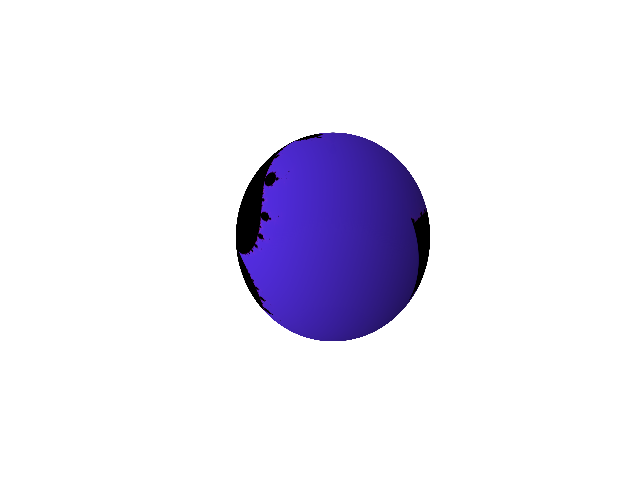

In [13]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb


def mandelbrot(c, max_iterations=1000):
    """Compute the Mandelbrot fractal value for a complex number."""
    z = 0
    for n in range(max_iterations):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iterations

def generate_mandelbrot_on_sphere(resolution=1000, max_iterations=1000):
    """Generate Mandelbrot fractal mapped onto a sphere."""
    # Create a grid of spherical coordinates
    theta = np.linspace(0, np.pi, resolution)  # Co-latitude
    phi = np.linspace(0, 2*np.pi, resolution)  # Longitude
    theta, phi = np.meshgrid(theta, phi)
    
    # Map spherical coordinates to complex plane
    real = (phi - np.pi) / np.pi
    imag = 2 * (theta / np.pi - 0.5)
    c = real + 1j * imag
    
    mandelbrot_values = np.vectorize(mandelbrot)(c, max_iterations)
    
    # Normalize the Mandelbrot values for coloring
    mandelbrot_values_normalized = mandelbrot_values / max_iterations
    
    # Convert the Mandelbrot values to an HSV color
    hues = 0.7 + 0.3 * mandelbrot_values_normalized
    saturations = 0.8 * np.ones_like(hues)
    values = np.where(mandelbrot_values < max_iterations, 0.9, 0)
    colors = hsv_to_rgb(np.dstack([hues, saturations, values]))
    
    # Convert spherical coordinates to Cartesian for visualization
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return x, y, z, colors

def plot_mandelbrot_on_sphere(x, y, z, colors):
    """Visualize the Mandelbrot fractal mapped onto a sphere."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(x, y, z, facecolors=colors, rstride=1, cstride=1)
    ax.set_box_aspect([1, 1, 1])
    plt.axis('off')
    plt.savefig('test.png')
    plt.show()

# Generate and visualize the Mandelbrot fractal on a sphere
x, y, z, colors = generate_mandelbrot_on_sphere()
plot_mandelbrot_on_sphere(x, y, z, colors)
